<a href="https://colab.research.google.com/github/EricaSG/Capstone/blob/master/Primary_Capstone_Colorized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries and Data

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3944977603758228562, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6582960944978845386
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6423796399755250966
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15473652544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8366605205316171567
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Use the TensorFlow backend
from tensorflow import keras

In [5]:
import warnings
warnings.filterwarnings('ignore')
import random 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras import layers
from keras.models import Sequential
from sklearn.model_selection import train_test_split, cross_val_predict
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import itertools
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.optimizers import Adam, Adadelta, Adagrad, SGD, RMSprop
from keras import initializers
from keras.constraints import unit_norm, min_max_norm
from keras.applications.inception_v3 import InceptionV3

In [8]:
!unzip -uq "/content/drive/My Drive/Colorized_Images.zip" -d "/content/drive/My Drive/"

In [ ]:
# Use if downloading from a local machine
# train_color = 'Colorized_Images/c_train/'
# val_color = 'Colorized_Images/c_val/'
# test_color = 'Colorized_Images/c_test/'

In [9]:
# Use if downloading from the cloud
train_color = '/content/drive/My Drive/Colorized_Images/c_train/'
val_color = '/content/drive/My Drive/Colorized_Images/c_val/'
test_color = '/content/drive/My Drive/Colorized_Images/c_test/'

# Preprocessing

## Read in & Normalize Images

In [10]:
# Resize all 15,200 images in the train directory
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(train_color,
                                                     target_size=(128,128), batch_size=15200)

Found 15198 images belonging to 2 classes.


In [11]:
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(val_color,
                                                     target_size=(128,128), batch_size=16)

Found 16 images belonging to 2 classes.


In [12]:
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(test_color,
                                                     target_size=(128,128), batch_size=624)

Found 622 images belonging to 2 classes.


## Generate Image & Label Sets

In [14]:
# Iterate through all of the images and create image-label datasets
train_images, train_labels = next(train_gen)

In [15]:
val_images, val_labels = next(val_gen)

In [16]:
test_images, test_labels = next(test_gen)

In [17]:
# Verify the class labels
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
# Recheck for Class Imbalance
u = np.unique(train_labels, return_counts=True)
np.asarray(u).T

array([[0.0000e+00, 1.5198e+04],
       [1.0000e+00, 1.5198e+04]])

## Check the Shape of the Images and Labels

In [19]:
print('Shape of Train Images: ', np.shape(train_images))
print('Shape of Train Labels: ', np.shape(train_labels))
print('Shape of Validation Images: ', np.shape(val_images))
print('Shape of Validation Labels: ', np.shape(val_labels))
print('Shape of Test Images: ', np.shape(test_images))
print('Shape of Test Labels: ', np.shape(test_labels))

Shape of Train Images:  (15198, 128, 128, 3)
Shape of Train Labels:  (15198, 2)
Shape of Validation Images:  (16, 128, 128, 3)
Shape of Validation Labels:  (16, 2)
Shape of Test Images:  (622, 128, 128, 3)
Shape of Test Labels:  (622, 2)


### Transform the labels to (m X 1) matrices

In [20]:
train_labels_final = np.reshape(train_labels[:,0], (15198,1))
np.shape(train_labels_final)

(15198, 1)

In [21]:
val_labels_final = np.reshape(val_labels[:,0], (16,1))
np.shape(val_labels_final)

(16, 1)

In [22]:
test_labels_final = np.reshape(test_labels[:,0], (622,1))
np.shape(test_labels_final)

(622, 1)

### Verify the Image and Label Pairs


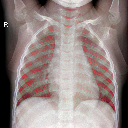

In [ ]:
# Select a random image to verify
array_to_img(train_images[10])

In [ ]:
# Return the respective label and verify that the label matches the image
train_labels_final[10, :]

array([1.], dtype=float32)

## Address Imbalance in Validation & Test Datasets

In [23]:
Xtrain, Xval, ytrain, yval = train_test_split(train_images, train_labels_final, train_size=0.9, test_size=0.1, random_state=42)

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain, train_size=0.78, random_state=42)

# Modeling

## Model 1: Model1_color

> Indented block



In [25]:
random.seed(123)

model1_color = Sequential()

model1_color.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model1_color.add(layers.MaxPooling2D((2, 2)))

model1_color.add(layers.Conv2D(64, (4, 4), activation='relu'))
model1_color.add(layers.MaxPooling2D((2, 2)))

model1_color.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1_color.add(layers.MaxPooling2D((2,2)))

# Flattening- Convert 2D matrix to a 1D vector
model1_color.add(layers.Flatten())
model1_color.add(layers.Dense(256, activation = 'relu'))
model1_color.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model1_color.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [27]:
model1_color.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Execute "early stopping" to stop the model when the loss has stopped improving
early_stopping = [EarlyStopping(monitor='val_loss', patience=10), 
                  ModelCheckpoint(filepath='model1_color.h5', monitor='val_accuracy', save_best_only=True)]

In [29]:
results1 = model1_color.fit(Xtrain, ytrain, epochs=100, batch_size=250, callbacks=early_stopping, validation_data=(Xval, yval))

Epoch 1/100
43/43 [==============================] - 3s 63ms/step - loss: 0.2266 - accuracy: 0.9006 - val_loss: 6.7159e-05 - val_accuracy: 1.0000
Epoch 2/100
43/43 [==============================] - 2s 52ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 2.3118e-05 - val_accuracy: 1.0000
Epoch 3/100
43/43 [==============================] - 2s 52ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 3.4732e-04 - val_accuracy: 1.0000
Epoch 4/100
43/43 [==============================] - 2s 52ms/step - loss: 7.8932e-04 - accuracy: 0.9998 - val_loss: 9.9066e-06 - val_accuracy: 1.0000
Epoch 5/100
43/43 [==============================] - 2s 51ms/step - loss: 2.1498e-04 - accuracy: 0.9999 - val_loss: 2.5049e-04 - val_accuracy: 1.0000
Epoch 6/100
43/43 [==============================] - 2s 52ms/step - loss: 3.8853e-04 - accuracy: 0.9998 - val_loss: 1.9100e-05 - val_accuracy: 1.0000
Epoch 7/100
43/43 [==============================] - 2s 52ms/step - loss: 4.0214e-05 - accuracy: 1.0000 - val_lo

### Evaluate: Model1_color

In [32]:
model1_color.evaluate(Xtrain, ytrain)

334/334 [==============================] - 2s 5ms/step - loss: 3.8850e-08 - accuracy: 1.0000


[3.884951738086784e-08, 1.0]

In [33]:
model1_color.evaluate(Xval, yval)

48/48 [==============================] - 0s 5ms/step - loss: 2.0676e-08 - accuracy: 1.0000


[2.0676468537317305e-08, 1.0]

In [34]:
def visualize_training_results(results):
    """
   1 Input: The Training and 
    Validation/Testing Dictionary 
    of Loss and Accuracy
    
    Output: 2 Plots of Loss vs. Epochs
    and Accuracy vs. Epochs
    """
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['Validation Loss', 'Training Loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['Validation Accuracy', 'Training Accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

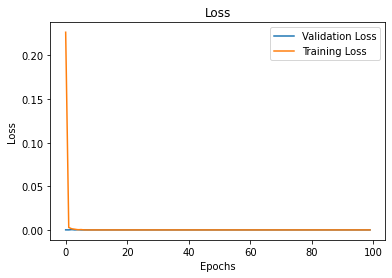

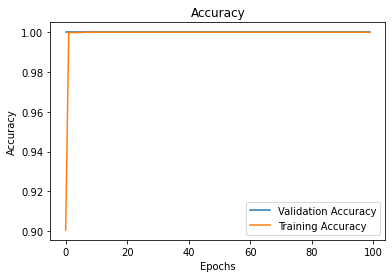

In [35]:
visualize_training_results(results1)

### Predictions

In [41]:
# Make Predictions
preds1 = model1_color.predict(Xval)

In [42]:
predictions1 = preds1 > 0.5

In [39]:
# Plot a confusion matrix
def plot_confusion_matrix(labels, preds):
    """
    Input: Validation/Testing Labels and
    model predictions
    
    Output: A confusion matrix
    
    """
    
    cnf_matrix = confusion_matrix(labels, preds)

    # Create the basic confusion matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Add appropriate axis scales
    y = train_gen.class_indices
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')

    # Add a legend
    plt.colorbar()
    plt.show()

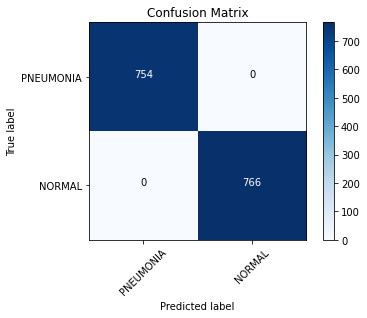

In [45]:
plot_confusion_matrix(yval, predictions1)

# Evaluation: Using Test Data Xtest, ytest

## Model 2: Model_test1, Default Paramters

In [46]:
random.seed(123)

model_test1 = Sequential()

model_test1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_test1.add(layers.MaxPooling2D((2, 2)))

model_test1.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_test1.add(layers.MaxPooling2D((2, 2)))

model_test1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_test1.add(layers.MaxPooling2D((2,2)))

# Flattening- Convert 2D matrix to a 1D vector
model_test1.add(layers.Flatten())
model_test1.add(layers.Dense(256, activation = 'relu'))
model_test1.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model_test1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        32832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [48]:
model_test1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
save_model = ModelCheckpoint(filepath='model_test1.h5', monitor='val_accuracy', save_best_only=True)

In [50]:
test_results3 = model_test1.fit(Xtrain, ytrain, epochs=100, batch_size=256, callbacks=save_model, validation_data=(Xtest, ytest))

Epoch 1/100
42/42 [==============================] - 3s 65ms/step - loss: 0.1918 - accuracy: 0.9102 - val_loss: 0.0782 - val_accuracy: 0.9365
Epoch 2/100
42/42 [==============================] - 2s 58ms/step - loss: 0.0209 - accuracy: 0.9959 - val_loss: 0.0047 - val_accuracy: 0.9997
Epoch 3/100
42/42 [==============================] - 2s 54ms/step - loss: 0.0062 - accuracy: 0.9997 - val_loss: 0.0042 - val_accuracy: 0.9997
Epoch 4/100
42/42 [==============================] - 2s 55ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 5/100
42/42 [==============================] - 2s 54ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0031 - val_accuracy: 0.9997
Epoch 6/100
42/42 [==============================] - 2s 53ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 7/100
42/42 [==============================] - 2s 54ms/step - loss: 6.6973e-04 - accuracy: 0.9997 - val_loss: 0.0033 - val_accuracy: 0.9997
Ep

### Evaluate: Model_test1

In [51]:
model_test1.evaluate(Xtrain, ytrain)

334/334 [==============================] - 2s 5ms/step - loss: 1.4967e-07 - accuracy: 1.0000


[1.4966897765589238e-07, 1.0]

In [53]:
model_test1.evaluate(Xtest, ytest)

95/95 [==============================] - 0s 5ms/step - loss: 9.8507e-04 - accuracy: 0.9997


[0.000985067104920745, 0.999667763710022]

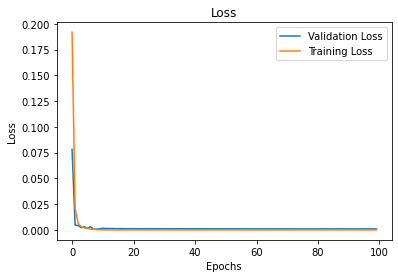

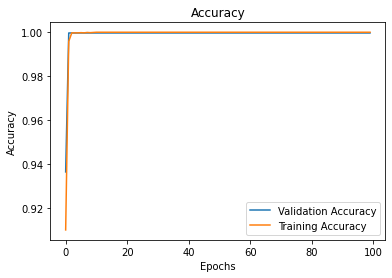

In [55]:
visualize_training_results(test_results3)

### Predictions

In [56]:
# Make Predictions
preds2 = model_test1.predict(Xtest)

In [57]:
predictions2 = preds2 > 0.5

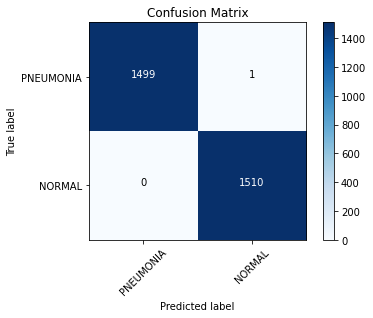

In [59]:
plot_confusion_matrix(ytest, predictions2)